In [126]:
# import  importaint library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans


In [127]:
# Import Dataset in collab environment
df=pd.read_excel ("/content/EastWestAirlines.xlsx",sheet_name='data')

In [66]:
# Dataset Preview (First five rows)
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [67]:
#Dataset Preview (Last five rows)
df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [128]:
# Dataset rows and column
df.shape

(3999, 12)

In [129]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 3999
Number of columns: 12


In [130]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [71]:
#Description of numerical columns
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [131]:
#Checking Diplicated valuse
df.duplicated().sum()

0

In [73]:
#Checking Null Values
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


<Axes: >

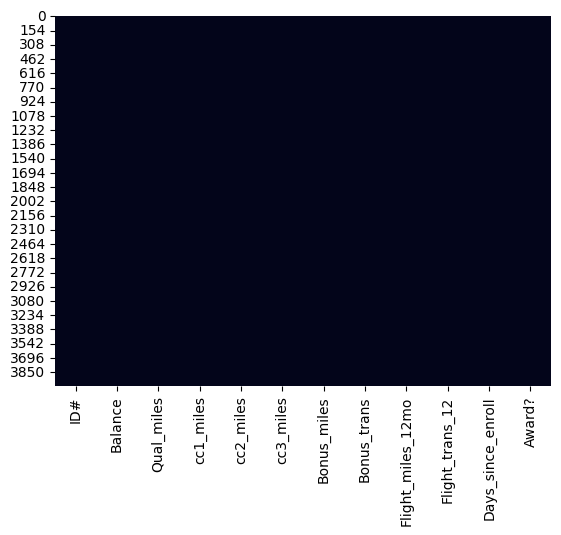

In [74]:
#Null Values Visualization
sns.heatmap(df.isnull(),cbar=False)

In [132]:
#Checking Unique Values
for i in df.columns:
  print(f'No. of unique values in {i} is\t{df[i].nunique()}.')


No. of unique values in ID# is	3999.
No. of unique values in Balance is	3904.
No. of unique values in Qual_miles is	164.
No. of unique values in cc1_miles is	5.
No. of unique values in cc2_miles is	3.
No. of unique values in cc3_miles is	5.
No. of unique values in Bonus_miles is	2734.
No. of unique values in Bonus_trans is	57.
No. of unique values in Flight_miles_12mo is	343.
No. of unique values in Flight_trans_12 is	35.
No. of unique values in Days_since_enroll is	2820.
No. of unique values in Award? is	2.


In [133]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

# EDA

In [134]:
#Renaming column
df.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True)

In [135]:
# Columns after Renaming
df.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [79]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# EDA

In [80]:
# Total Award count
df['Award'].value_counts()

,count
Award,
0,2518
1,1481


<Axes: xlabel='Award', ylabel='ID'>

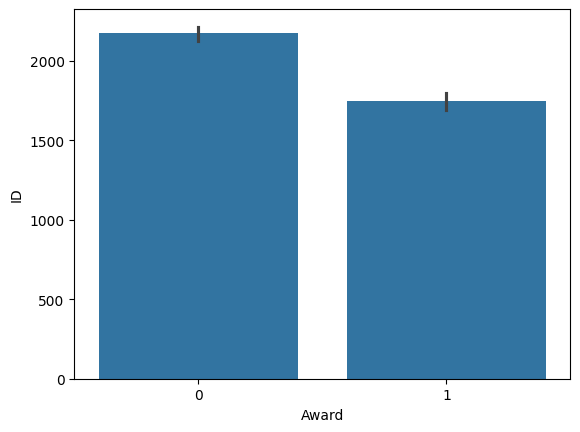

In [81]:
sns.barplot(x='Award',y='ID',data=df)

In [82]:
# miles earned as per small business card.
cc3=df['cc3_miles'].value_counts().reset_index()
cc3.columns=['count','miles_earned']
cc3

,count,miles_earned
0,1,3981
1,4,6
2,5,5
3,3,4
4,2,3


<Axes: xlabel='count', ylabel='miles_earned'>

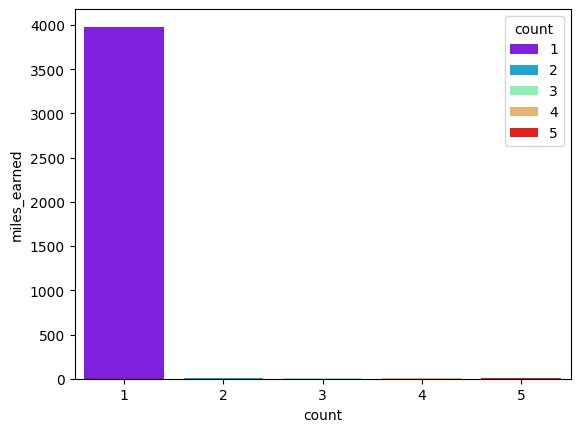

In [83]:
sns.barplot(x='count',y='miles_earned',data=cc3,hue='count',palette='rainbow')

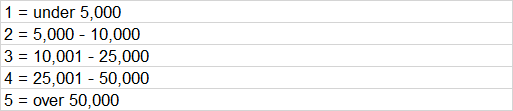

* Majority of the airlines have eraned under 5000 miles earned with small business card.

In [84]:
# miles earned as per flyer credit card.
cc1=df['cc1_miles'].value_counts().reset_index()
cc1.columns=['count','miles_earned']
cc1
cc1

,count,miles_earned
0,1,2289
1,3,613
2,4,525
3,5,288
4,2,284


In [85]:
import plotly.express as px
fig = px.pie(cc1, values='miles_earned', names='count', title=' miles earned with freq. flyer credit card')
fig.show()


* Majority of the airlines have eraned under 5000 miles with freq. flyer credit card.

In [86]:
#miles earned as per reward credit card.
cc2=df['cc2_miles'].value_counts().reset_index()
cc2.columns=['count','miles_earned']
cc2

,count,miles_earned
0,1,3956
1,2,28
2,3,15


In [87]:
fig = px.pie(cc2, values='miles_earned', names='count', title=' miles earned with reward credit card')
fig.show()


In [88]:
flight_trans=df['Flight_trans_12'].value_counts().reset_index()
flight_trans.columns=['count','miles_earned']
flight_trans

,count,miles_earned
0,0,2723
1,1,469
2,2,242
3,3,132
4,4,97
5,5,58
6,6,43
7,9,32
8,8,31
9,7,30


## Histogram for numerical columns

<Axes: xlabel='Qual_miles', ylabel='Count'>

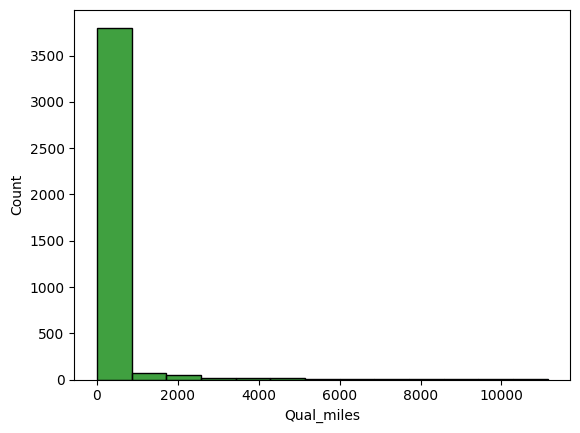

In [89]:
sns.histplot(df['Qual_miles'],color='green')

* By analyzing above plot i can say data is right skew and outlier may present.

<Axes: xlabel='Balance', ylabel='Count'>

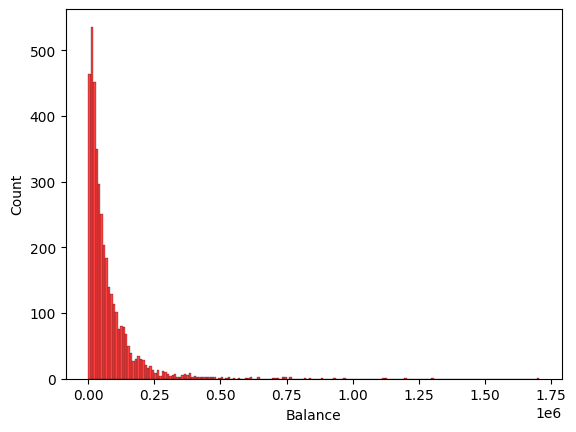

In [90]:
sns.histplot(df['Balance'],color='red')


* By analyzing above plot i can say data is right skew and outlier may present.

<Axes: xlabel='cc1_miles', ylabel='Count'>

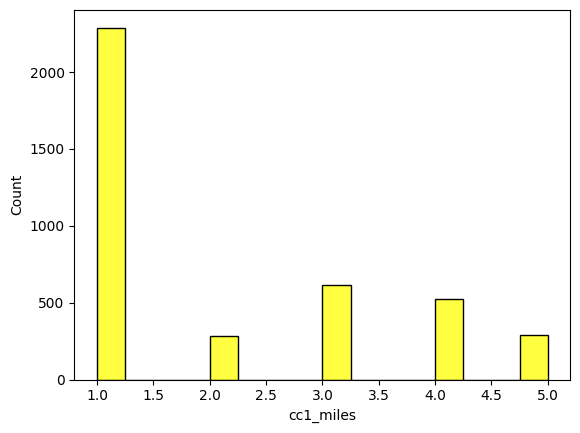

In [91]:
sns.histplot(df['cc1_miles'],color='yellow')


<Axes: xlabel='cc2_miles', ylabel='Count'>

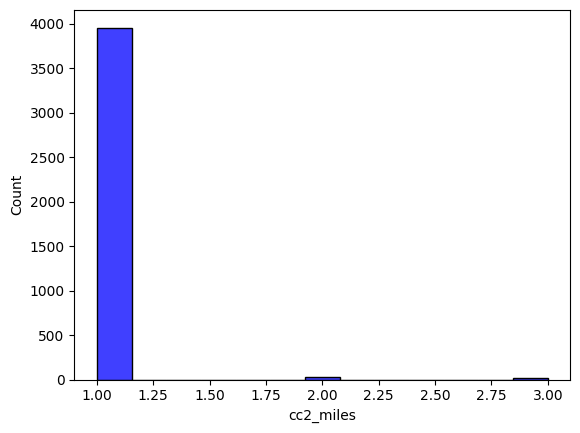

In [92]:
sns.histplot(df['cc2_miles'],color='blue')


<Axes: xlabel='cc3_miles', ylabel='Count'>

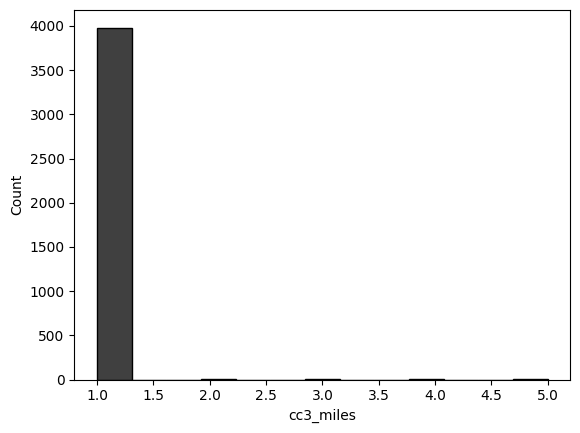

In [93]:
sns.histplot(df['cc3_miles'],color='black')


<Axes: xlabel='Bonus_miles', ylabel='Count'>

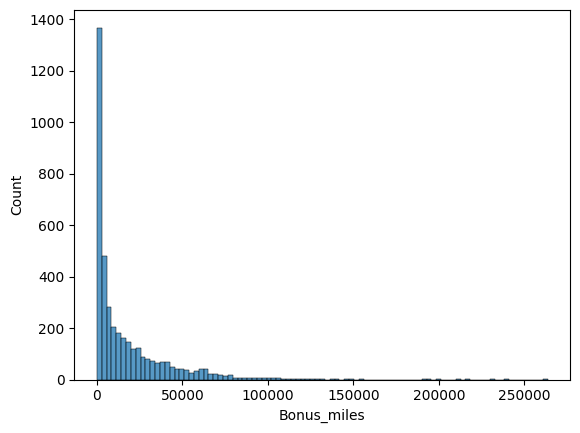

In [94]:
sns.histplot(df['Bonus_miles'])


* By analyzing above plot i can say data is right skew and outlier may present.

<Axes: xlabel='Bonus_trans', ylabel='Count'>

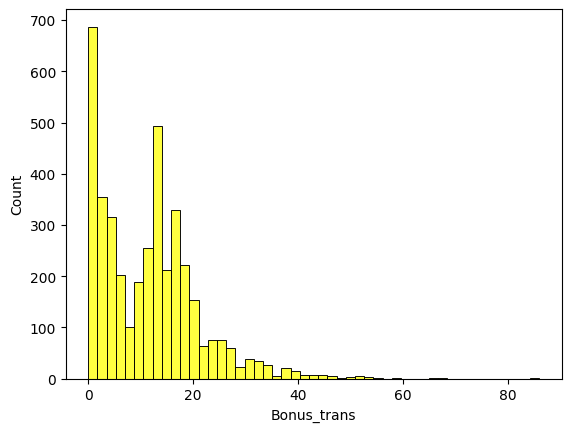

In [95]:
sns.histplot(df['Bonus_trans'],color='yellow')


* By analyzing above plot i can say data is right skew and outlier may present.

<Axes: xlabel='Flight_miles_12mo', ylabel='Count'>

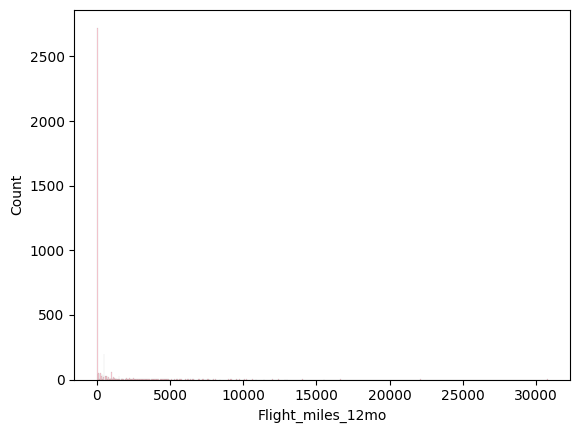

In [96]:

sns.histplot(df['Flight_miles_12mo'],color='pink')


* By analyzing above plot i can say data is right skew and outlier may present.

<Axes: xlabel='Flight_trans_12', ylabel='Count'>

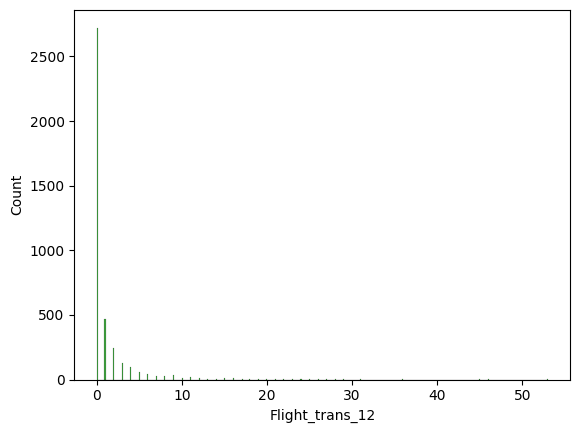

In [97]:
sns.histplot(df['Flight_trans_12'],color='green')


* By analyzing above plot i can say data is right skew and outlier may present.

<Axes: xlabel='Days_since_enroll', ylabel='Count'>

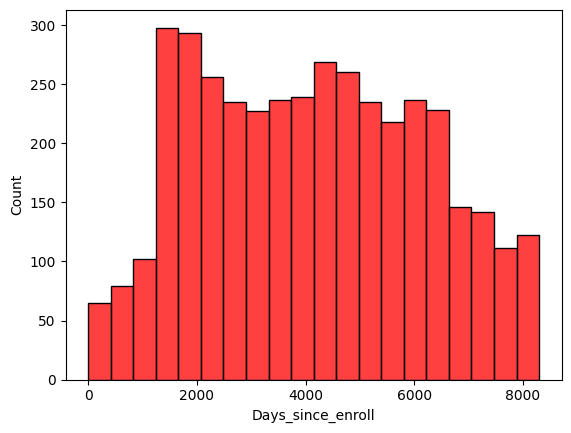

In [98]:
sns.histplot(df['Days_since_enroll'],color='red')

<Axes: >

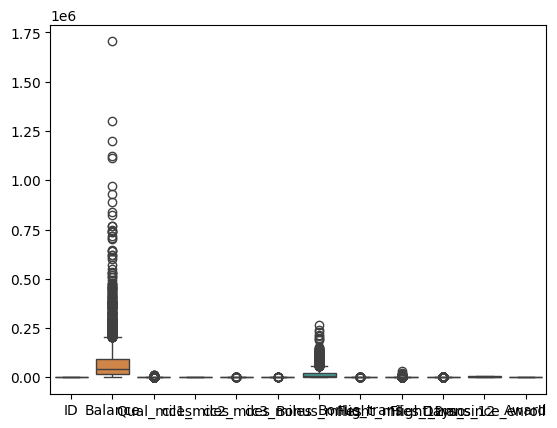

In [99]:
sns.boxplot(df)

* By analyzing above plot i can say outlier are  present in few columns.

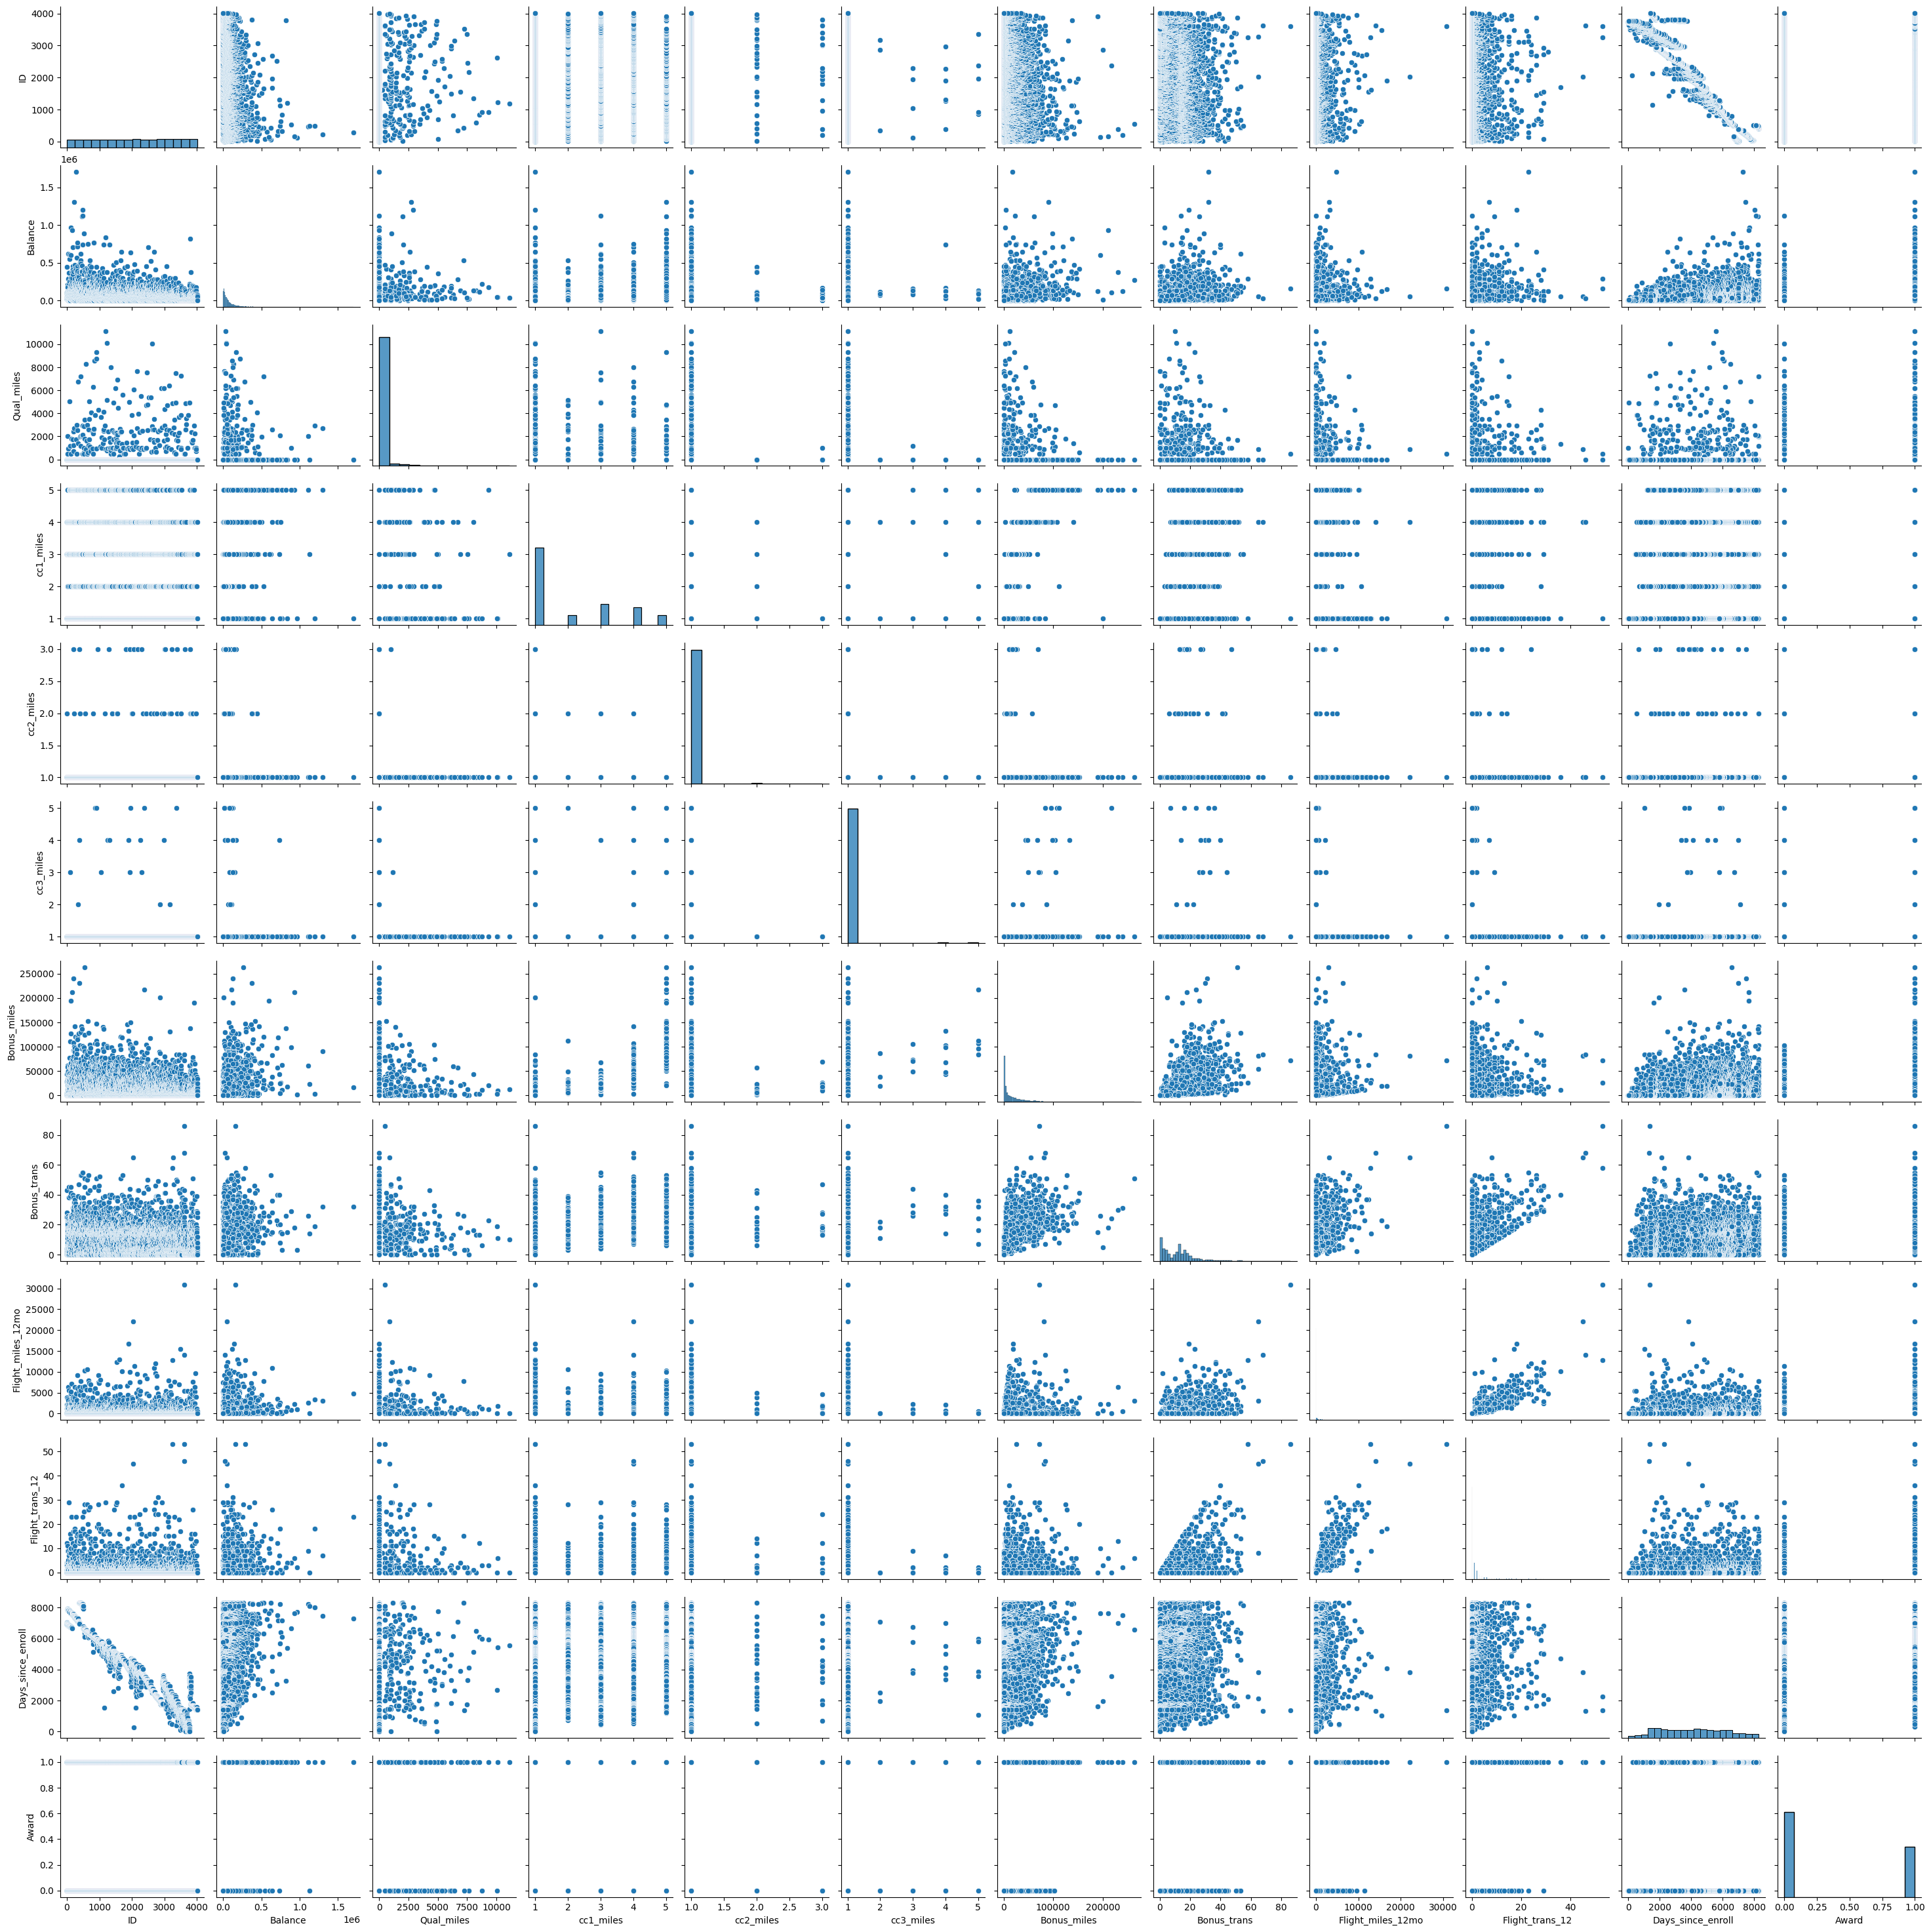

In [100]:
sns.pairplot(df)

# Preprocessing

In [101]:
# Removing Unwanted Columns
df.drop(['ID','Award'],axis=1,inplace=True)

In [102]:
#Outliers Treatment
def outlier_treatment(df,col):
  Q1,Q3=df[col].quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  return lower_limit,upper_limit

<Axes: ylabel='Balance'>

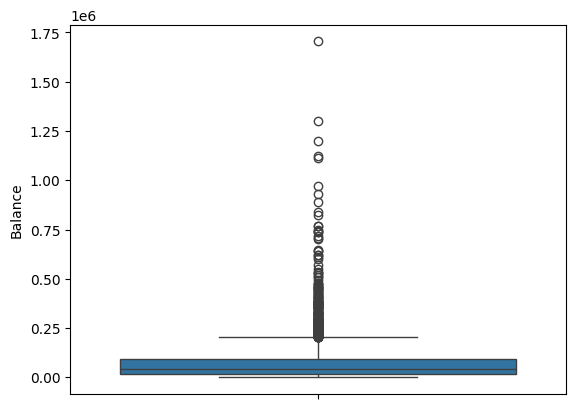

In [103]:
# Outlier treatment on balance column
sns.boxplot(df['Balance'])

In [104]:
lower_limit,upper_limit=outlier_treatment(df,'Balance')

In [105]:
df['Balance']=np.where(df['Balance']>upper_limit,upper_limit,df['Balance'])

<Axes: ylabel='Balance'>

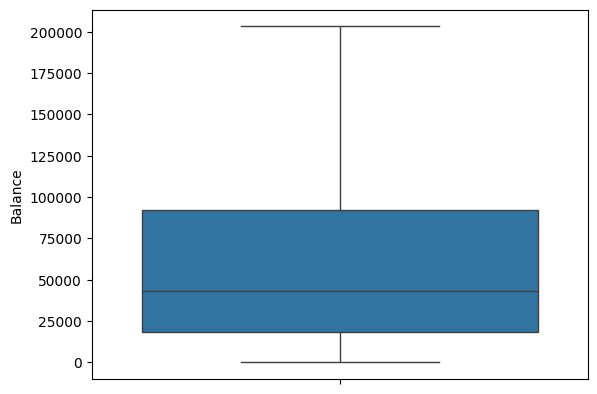

In [106]:
# After treatment
sns.boxplot(df['Balance'])

In [107]:
#Outlier Treatment on Qual_miles
li=['Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll']
for i in li:

 lower_limit,upper_limit=outlier_treatment(df,i)
 print(lower_limit,upper_limit)
 df[i]=np.where(df[i]>upper_limit,upper_limit,df[i])

0.0 0.0
-2.0 6.0
1.0 1.0
1.0 1.0
-32575.75 57626.25
-18.0 38.0
-466.5 777.5
-1.5 2.5
-2860.75 10981.25


In [108]:
li=['Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll']
for i in li:

 lower_limit,upper_limit=outlier_treatment(df,i)
 print(f"Upper limit and  lower limits for columns {i}")
 print(lower_limit," , ",upper_limit)
 df[i]=np.where(df[i]<lower_limit,lower_limit,df[i])

Upper limit and  lower limits for columns Qual_miles
0.0  ,  0.0
Upper limit and  lower limits for columns cc1_miles
-2.0  ,  6.0
Upper limit and  lower limits for columns cc2_miles
1.0  ,  1.0
Upper limit and  lower limits for columns cc3_miles
1.0  ,  1.0
Upper limit and  lower limits for columns Bonus_miles
-32575.75  ,  57626.25
Upper limit and  lower limits for columns Bonus_trans
-18.0  ,  38.0
Upper limit and  lower limits for columns Flight_miles_12mo
-466.5  ,  777.5
Upper limit and  lower limits for columns Flight_trans_12
-1.5  ,  2.5
Upper limit and  lower limits for columns Days_since_enroll
-2860.75  ,  10981.25


## After Outlier treatment

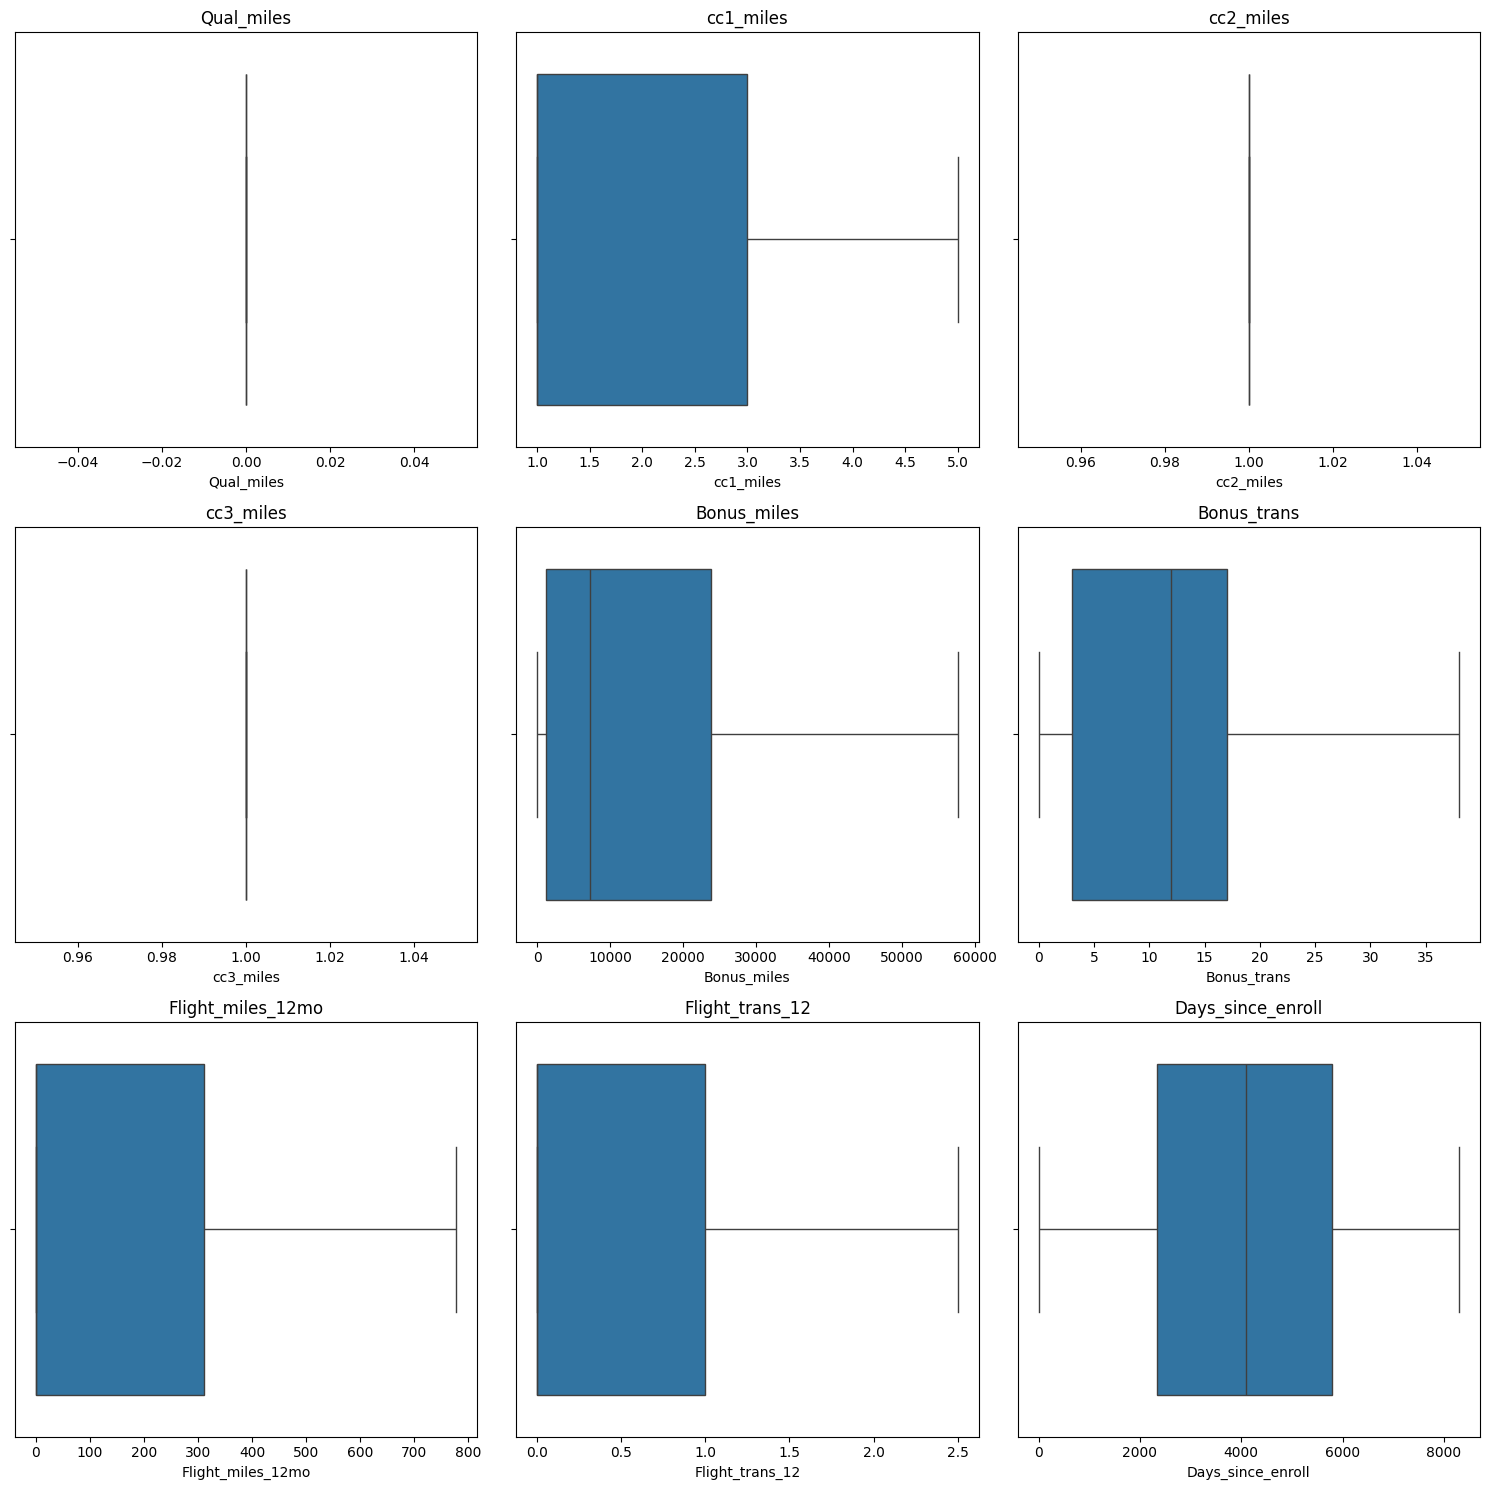

In [109]:
li=['Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll']
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(li):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [110]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_norm=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [111]:
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.607258,0.0,-0.769578,0.0,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454
1,-0.758947,0.0,-0.769578,0.0,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957
2,-0.382070,0.0,-0.769578,0.0,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920
3,-0.835106,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208
4,0.579265,0.0,1.409471,0.0,0.0,1.543191,1.594189,2.034489,2.020176,1.363975


# Model

## Hierarchical_Clustering

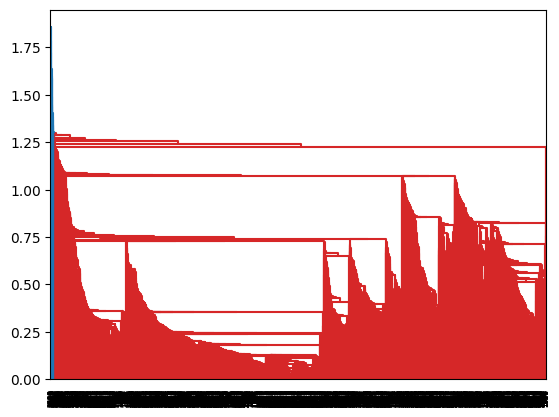

In [112]:
## create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [113]:
# create clusters, suppose got input from customer that go for 4 clusters
hc = AgglomerativeClustering(n_clusters=4, metric = 'euclidean',linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [114]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Cluster_No'])

In [115]:
Clusters

,Cluster_No
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [116]:
df['h_clusterid'] = Clusters

In [117]:
# data set view after adding Hierarchical clustors
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,777.5,2.5,6935.0,0


## K-Means Clustor

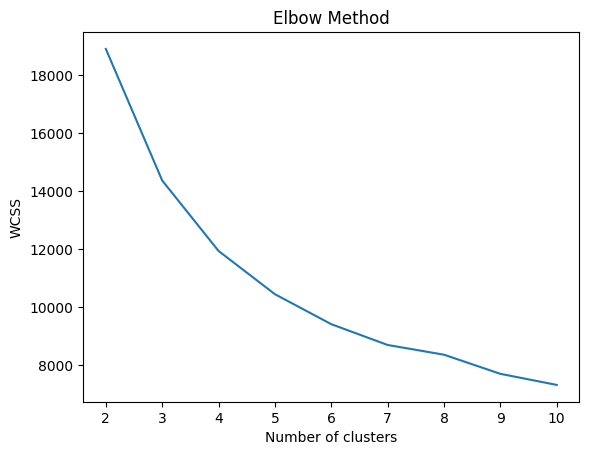

In [156]:
# Plotting Elbow plot for k value
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

*  In above plot i can say there is drastically change in wcss value near 3 and 4 clustor so we check  evaluation on clustors for 3 and 4.

In [119]:
# Model clustor where n=3
kmeans3 = KMeans(n_clusters=3,random_state=0)
predict3=kmeans3.fit_predict(df_norm)

In [120]:
# Model clustor where n=4
kmeans4 = KMeans(n_clusters=4,random_state=0)
predict4=kmeans4.fit_predict(df_norm)

In [121]:
kmeans5 = KMeans(n_clusters=5,random_state=0)
predict5=kmeans5.fit_predict(df_norm)

In [122]:
#Copy dataset
df1=df.copy()
df2=df.copy()

In [123]:
df1['cluster_3'] = predict3

In [124]:
#Data set after adding n=3
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid,cluster_3
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0,0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0,0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0,0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0,0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,777.5,2.5,6935.0,0,2


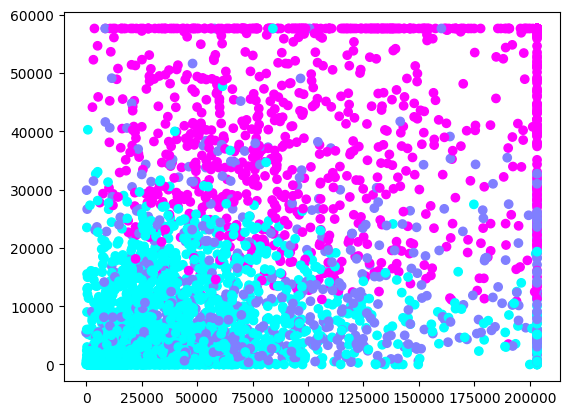

In [125]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,5],c=predict3,cmap='cool')

* In above plot we can see 3 clustor  between banlance and cc3 miles.

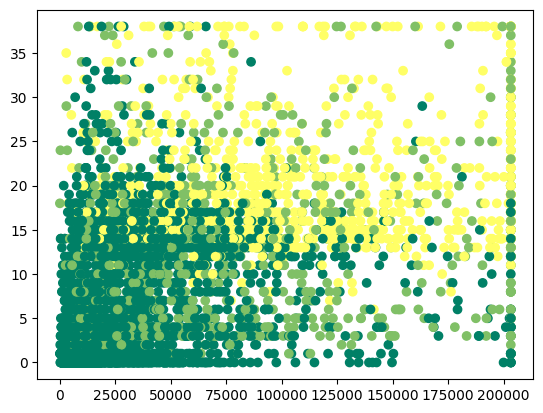

In [136]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,6],c=predict3,cmap='summer')

 * In above plot we can see  3 clustor between banlance and bonus mile.

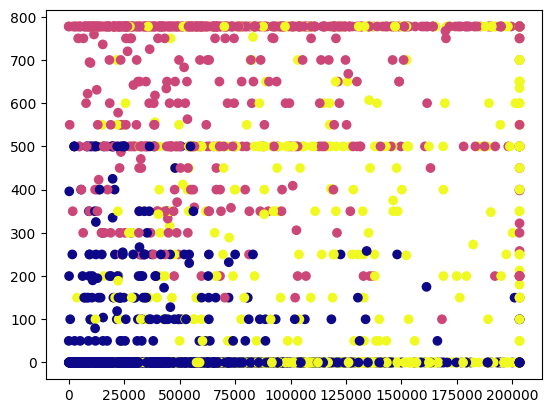

In [137]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,7],c=predict3,cmap='plasma')

In [138]:
df2['cluster_4'] = predict4

In [139]:
df2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid,cluster_4
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0,0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0,0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0,0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0,0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,777.5,2.5,6935.0,0,2


In [140]:
df2.groupby('cluster_4').mean('numeric_only')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
cluster_4,,,,,,,,,,,
0,31951.863887,0.0,1.132562,1.0,1.0,3455.160442,5.937927,12.192530,0.064177,3589.117307,0.000000
1,75890.129310,0.0,1.221003,1.0,1.0,7668.947100,10.526646,637.977273,2.070533,4093.648903,0.004702
2,127277.539773,0.0,4.055556,1.0,1.0,44729.776515,24.851010,643.967172,2.013889,5097.719697,0.002525
3,89709.091165,0.0,3.475564,1.0,1.0,30501.383694,16.941729,25.212406,0.117481,4715.001880,0.001880


In [141]:
df1.groupby('cluster_3').mean('numeric_only')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
cluster_3,,,,,,,,,,,
0,37020.826813,0.0,1.355604,1.0,1.0,5410.741209,7.328791,17.048352,0.079560,3685.099780,0.000000
1,81862.286119,0.0,1.490085,1.0,1.0,11062.427762,12.822946,668.859773,2.157224,4220.276204,0.005666
2,110995.696955,0.0,4.027505,1.0,1.0,40774.068517,19.788802,197.489686,0.649804,5016.701375,0.001965


In [142]:
silhouette_score(df_norm,predict4)

0.3411776895124208

## DBSCAN

In [143]:
df.shape

(3999, 12)

In [144]:
from sklearn.cluster import DBSCAN

In [145]:
dbsc = DBSCAN(eps=1, min_samples=7) # default eps=0.5
y = dbsc.fit_predict(df_norm)
y

array([0, 0, 0, ..., 0, 2, 0])

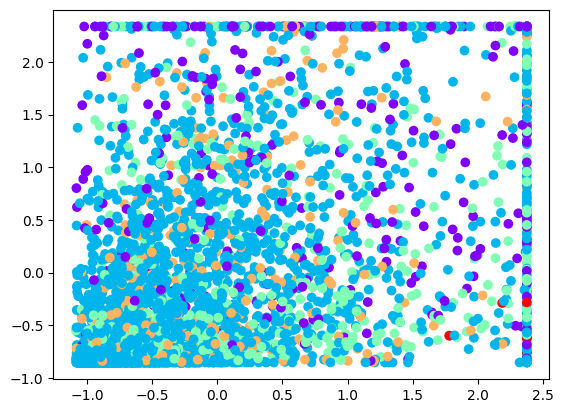

In [147]:
plt.scatter(df_norm.iloc[:,0],df_norm.iloc[:,5],c=y,cmap='rainbow')

* In above plot we can see clustor and noise between banlance and  cc3 miles.

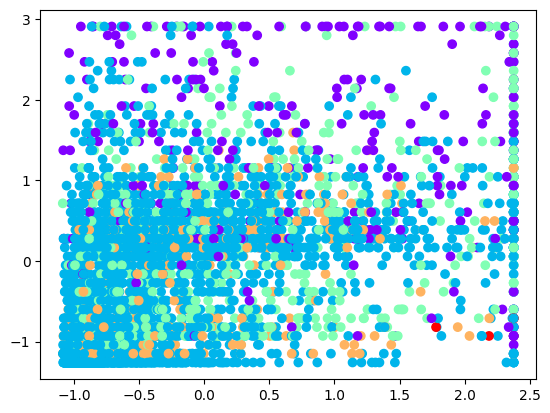

In [148]:
plt.scatter(df_norm.iloc[:,0],df_norm.iloc[:,6],c=y,cmap='rainbow')

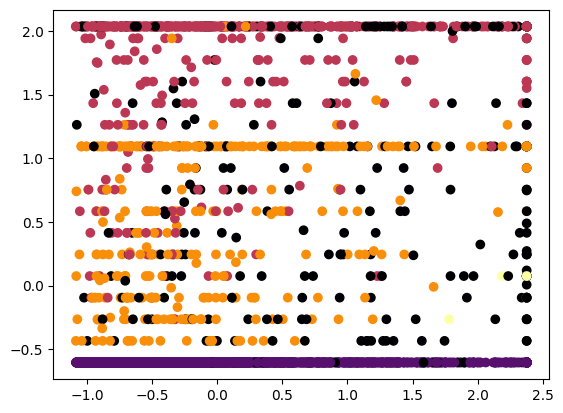

In [149]:
plt.scatter(df_norm.iloc[:,0],df_norm.iloc[:,7],c=y,cmap='inferno')

* In above plot we can see clustor and noise between banlance and bonus miles.

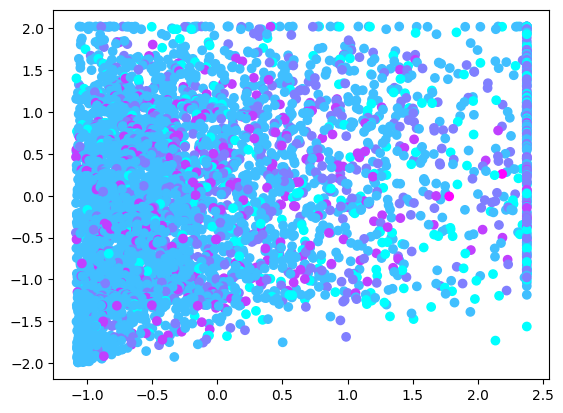

In [150]:
plt.scatter(df_norm.iloc[:,0],df_norm.iloc[:,9],c=y,cmap='cool')

*  In above plot we can see clustor and noise between banlance and flight trans of 12 month

In [152]:
df.columns


Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [151]:
# silhouette_score
 silhouette_score(df_norm,y)

0.12122218462011371